#### Description

This code uses <b>Random Search</b> to find optimal hyperparameters for the GA_2_2 GeneticAlgorithm run method:
* chromosomes
* islands
* num_parents
* gene_flow_rate

From GA_Testing_2_2_hp and GA_Testing_2_2_mutation_rate_2, we see that base_mutation_rate should be around 0.05. Here we fix it as a control variable and vary the above values. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import time
import random

from GA_2_2 import GeneticAlgorithm

In [ ]:
# Control variables
cnn_model_path = '../Models/CNN_6_1_2.keras'
masked_sequence = 'NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN'
max_length = 150
pop_size = 200
generations = 100
precision = 0.1
base_mutation_rate = 0.05

# Testing variables
combinations = 50
run_per_combination = 5
results = []
target_expressions = [0, 1]

In [3]:
for target_expression in target_expressions:
    for combination_id in range(combinations):

        # Randomly select values for each of the dependent variables
        chromosomes = random.randint(1, 16)
        islands = random.randint(1, 16)
        num_parents = random.randint(1, 16)
        gene_flow_rate = random.uniform(0, 1)

        # Store the error and run time for each run
        errors = []
        run_times = []

        print(f'Running with base_mutation_rate={base_mutation_rate:.3f} | chromosomes={chromosomes} | islands={islands} | num_parents={num_parents} | gene_flow_rate={gene_flow_rate:.3f}', end='')

        for run_id in range(run_per_combination):
            ga = GeneticAlgorithm(
                cnn_model_path=cnn_model_path,
                masked_sequence=masked_sequence,
                target_expression=target_expression,
                max_length=max_length,
                pop_size=pop_size,
                generations=generations,
                base_mutation_rate=base_mutation_rate,  # Control Variable
                precision=precision,
                chromosomes=chromosomes, # Dependent variable
                islands=islands, # Dependent variable
                num_parents=num_parents, # Dependent variable
                gene_flow_rate=gene_flow_rate, # Dependent variable
                print_progress=False
            )
            try:
                # Time the run
                start_time = time.time()
                best_sequence, best_prediction = ga.run()
                end_time = time.time()
                run_time = end_time - start_time
            except Exception as e:
                print(f' Error: {e}')
                continue

            errors.append(abs(best_prediction - target_expression))
            run_times.append(run_time)
            
        # Record the results
        results.append({
            'target_expression': target_expression,
            'combination_id': combination_id + 1,
            'run_id': run_id + 1,
            'chromosomes': chromosomes,
            'num_parents': num_parents,
            'islands': islands,
            'gene_flow_rate': gene_flow_rate,
            'errors': errors,
            'run_times': run_times,
            'average_error': np.mean(errors),
            'average_run_time': np.mean(run_times)
        })
            
        # print Averaged combination error
        print(f' | average_error={np.mean(errors):.3f}')

# Convert results to a DataFrame for analysis
results_df = pd.DataFrame(results)

Running with base_mutation_rate=0.050 | chromosomes=8 | islands=7 | num_parents=10 | gene_flow_rate=0.518WARNING:tensorflow:From c:\Users\rsore\Documents\GitHub\promoter-sequence-transcription-rates\v2\Testing GA\GA_2_2.py:111: _EagerTensorBase.cpu (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.identity with explicit device placement instead.


c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


 | average_error=0.091
Running with base_mutation_rate=0.050 | chromosomes=10 | islands=14 | num_parents=9 | gene_flow_rate=0.067 | average_error=0.093
Running with base_mutation_rate=0.050 | chromosomes=10 | islands=10 | num_parents=16 | gene_flow_rate=0.717 | average_error=0.096
Running with base_mutation_rate=0.050 | chromosomes=12 | islands=15 | num_parents=9 | gene_flow_rate=0.578 | average_error=0.092
Running with base_mutation_rate=0.050 | chromosomes=15 | islands=11 | num_parents=8 | gene_flow_rate=0.426 | average_error=0.094
Running with base_mutation_rate=0.050 | chromosomes=12 | islands=2 | num_parents=15 | gene_flow_rate=0.496 | average_error=0.098
Running with base_mutation_rate=0.050 | chromosomes=7 | islands=10 | num_parents=10 | gene_flow_rate=0.911 | average_error=0.090
Running with base_mutation_rate=0.050 | chromosomes=15 | islands=14 | num_parents=6 | gene_flow_rate=0.136 | average_error=0.092
Running with base_mutation_rate=0.050 | chromosomes=3 | islands=4 | num_p

In [4]:
results_df.sort_values(by='average_error').head()

,target_expression,combination_id,run_id,chromosomes,num_parents,islands,gene_flow_rate,errors,run_times,average_error,average_run_time
65,1,16,5,16,14,14,0.329835,"[0.05285501480102539, 0.06150102615356445, 0.0...","[22.710045099258423, 22.111388206481934, 21.21...",0.049701,21.838280
97,1,48,5,2,4,15,0.593245,"[0.07441568374633789, 0.0661432147026062, 0.06...","[31.434892654418945, 31.58999228477478, 31.686...",0.049873,31.418576
53,1,4,5,12,12,11,0.579137,"[0.047082483768463135, 0.0344470739364624, 0.0...","[19.063326120376587, 17.828272104263306, 19.01...",0.055887,18.626629
73,1,24,5,4,9,7,0.969868,"[0.0711359977722168, 0.04689401388168335, 0.03...","[9.037171602249146, 9.40731430053711, 9.833326...",0.059252,9.323836
54,1,5,5,2,15,15,0.127009,"[0.07245230674743652, 0.06308776140213013, 0.0...","[23.418473958969116, 24.053459644317627, 23.08...",0.060935,23.496963


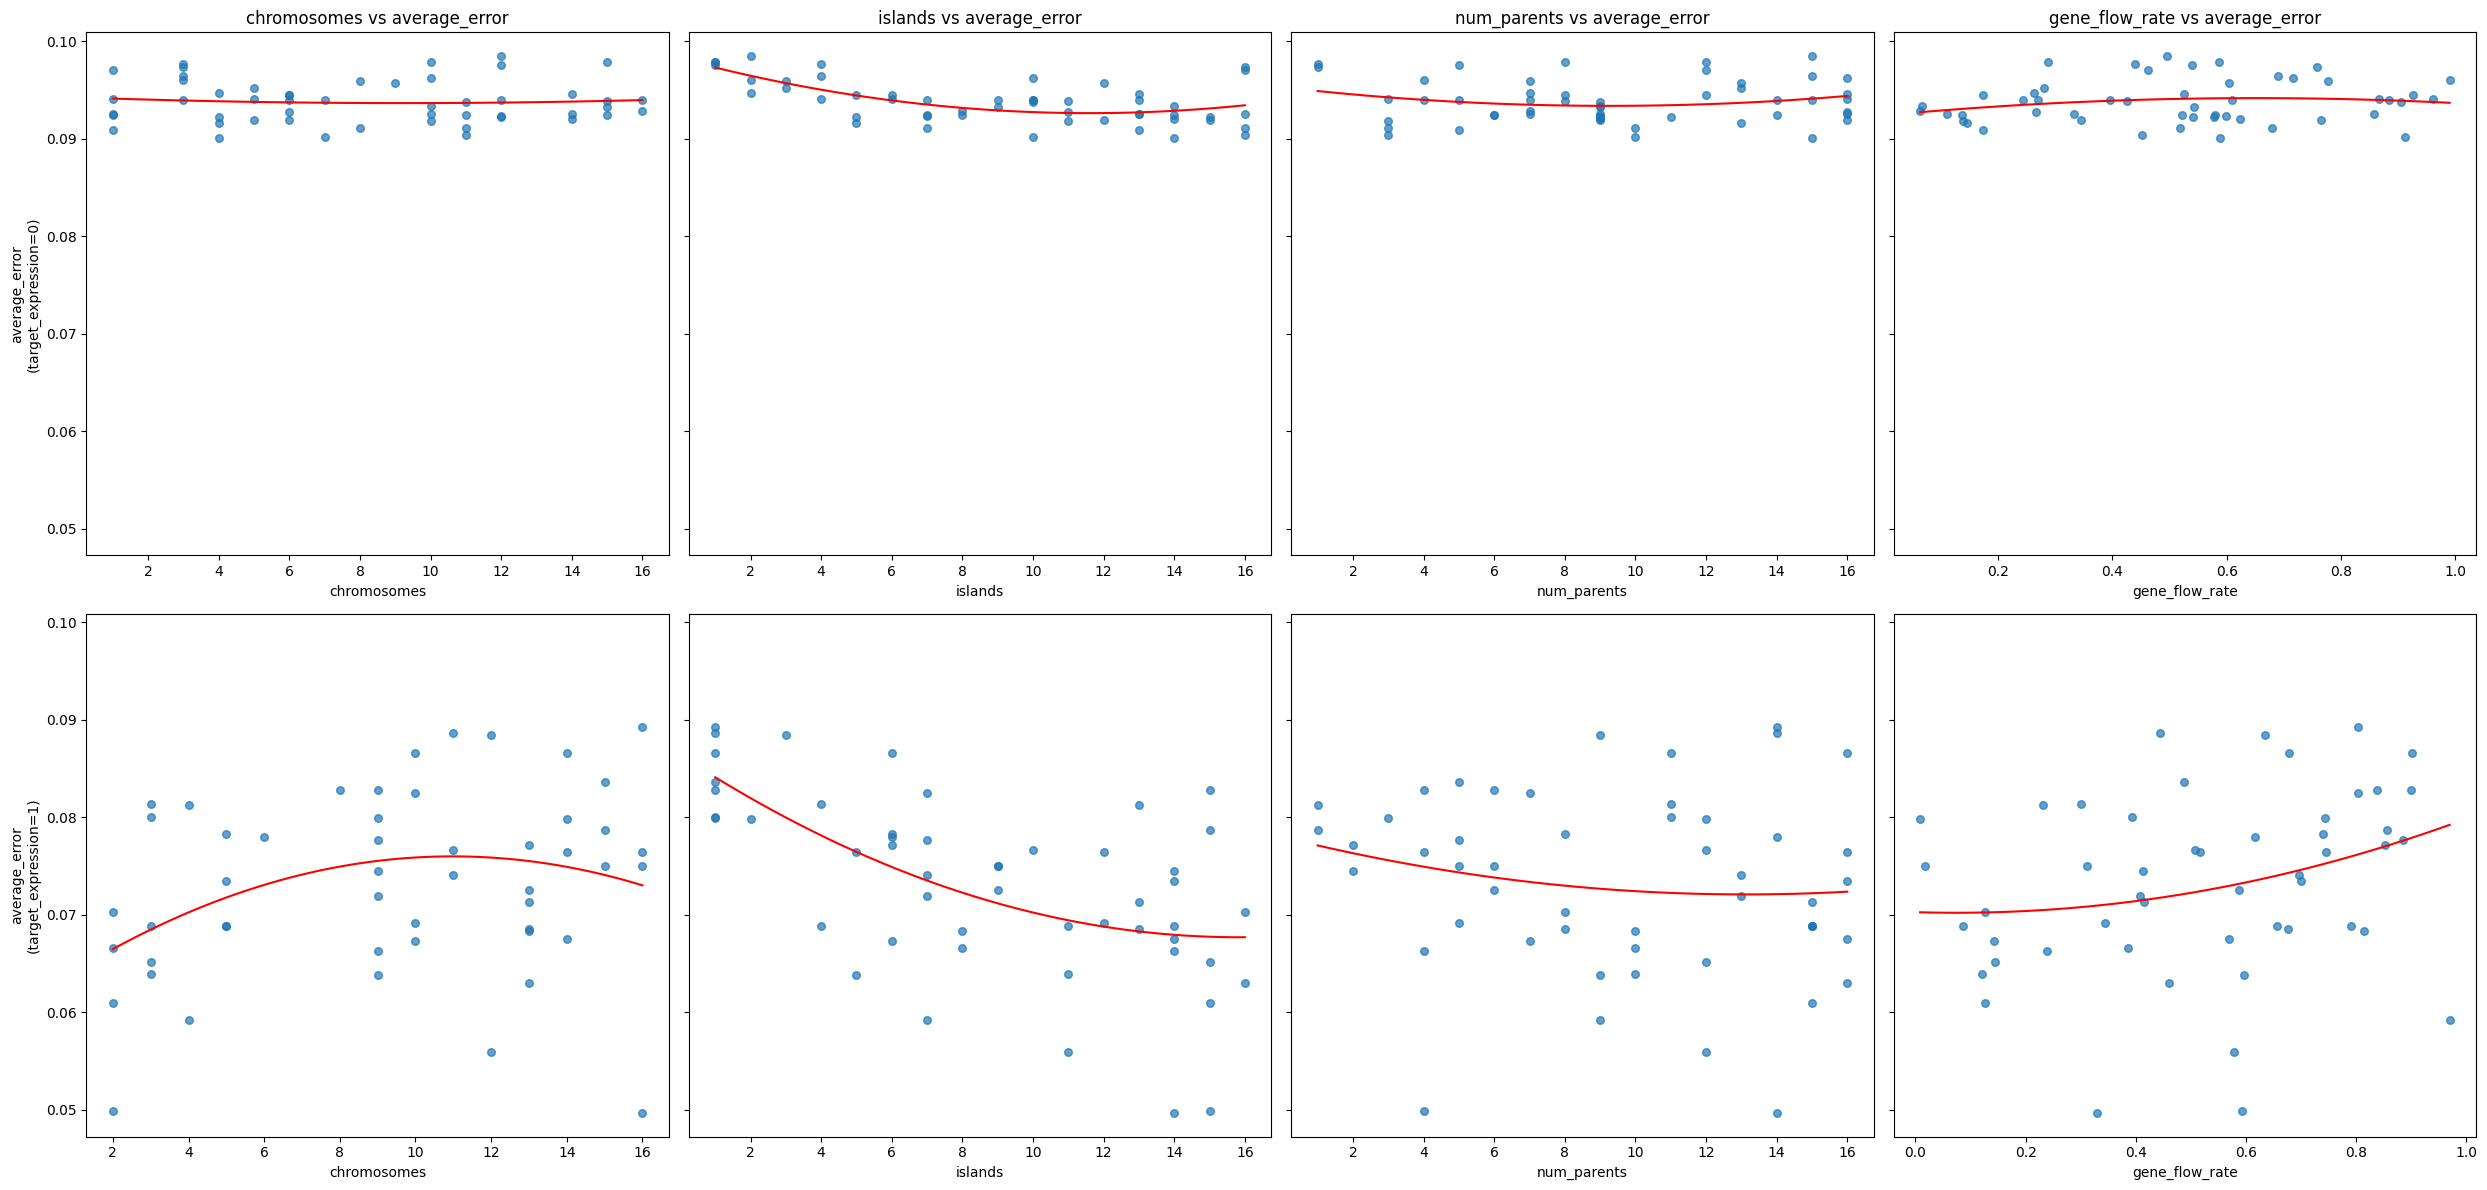

In [7]:
fig, axs = plt.subplots(2, 4, figsize=(25, 12), sharey=True)
dependent_variables = ['chromosomes', 'islands', 'num_parents', 'gene_flow_rate']
polynomial_degree = 2

for row, target_expression in enumerate(target_expressions):
    subset = results_df[results_df['target_expression'] == target_expression]
    for col, dependent_variable in enumerate(dependent_variables):
        ax = axs[row, col]
        ax.scatter(subset[dependent_variable], subset['average_error'], s=30, alpha=0.7)

        # Fit and plot a polynomial regression line
        poly_fit = np.polyfit(subset[dependent_variable], subset['average_error'], polynomial_degree)
        poly_fn = np.poly1d(poly_fit)
        x_vals = np.linspace(subset[dependent_variable].min(), subset[dependent_variable].max(), 100)
        ax.plot(x_vals, poly_fn(x_vals), color='red')

        # Set subplot title and labels
        if row == 0:
            ax.set_title(f'{dependent_variable} vs average_error')
        ax.set_xlabel(dependent_variable)
        if col == 0:
            ax.set_ylabel(f'average_error\n(target_expression={target_expression})')

# Adjust layout
plt.tight_layout()
plt.show()
